In [6]:
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [7]:
import pymunk
from pymunk.vec2d import Vec2d
import pymunk.matplotlib_util

In [8]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space


In [9]:
def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_y
        body.start_position = Vec2d(*body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)

We reuse the debug drawing code from pymunk.matplotlib_util. Currently this is not optimal since it doesnt reuse the artists added to the axes, instead we have to clear the axes each frame and redraw it which is quite expensive. Hopefully a future version of pymunk will support a better way to do it. 

For now if you want to draw a more complicated scene I recommend that you use pymunk.matplotlib_util as inspiration but write the drawing code yourself to better optimize the animation.

/var/folders/ns/_96n1s294bj9970ktj_ms9th0000gn/T/ipykernel_95526/124386559.py:8: DeprecationWarning: matplotlib_util.DrawOptions is deprecated. If you find it useful, please open an issue on the pymunk issue tracker at https://github.com/viblo/pymunk/issues Otherwise this is likely to be completely removed in a future Pymunk version.
  o = pymunk.matplotlib_util.DrawOptions(ax)


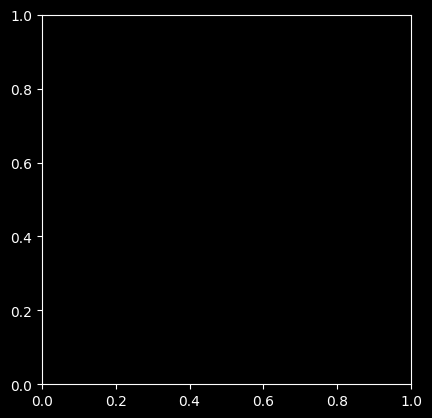

In [10]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

o = pymunk.matplotlib_util.DrawOptions(ax)


list(space.shapes)[1].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    space.debug_draw(o)
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    ax.clear()
    space.debug_draw(o)
    return []

frames = 105
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())